# 1.6 Polinomios de Taylor y diferenciación numérica

Este libro es para la parte de código de la [sección 1.6 de las notas](https://itam-ds.github.io/analisis-numerico-computo-cientifico/1.computo_cientifico/1.6/Polinomios_de_Taylor_y_diferenciacion_numerica.html)

# Teorema de Taylor
**Ejemplo**:
<br>Graficar la función y los polinomios de Taylor de grados $[0,1,2,3,4]$ y en una sola gráfica para el intervalo $[1,2]$ de la función $\frac{1}{x}$ con centro en $x_{0}=1.5$. ¿Cuánto es la aproximación de los polinomios en $x=1.9$? Calcula el error relativo de tus aproximaciones.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def aprox_taylor(x, c, n):
    """
    Taylor approximation for 1/x function. Will return Taylor polynomial of degree n with
    center in c and evaluated in x.
    Args:
        x: numeric vector or scalar in which Taylor polynomial will be evaluated. 
        c: scalar which represents center of Taylor polynomial of degree n.
        n: scalar which represents degree of Taylor polynomial. 
    --------------------
    Returns:
        sum_taylor: scalar evaluation of Taylor polynomial of degree n with center c in x.
    """
    sum_taylor = np.zeros((len(x)))
    
    for i in range(len(x)):
        #Se define el polinomio g0, constante para todas las iteraciones
        mult = c**(-1)
        sum_taylor[i] = mult
        #Se van agregando polinomios g>0 a la serie
        for j in range(n):
            mult = (-1) * c**(-1) * (x[i]-c) * mult
            sum_taylor[i] = sum_taylor[i] + mult
    
    return sum_taylor

### Graficando Taylor

In [3]:
#Se define la función que se desea aproximar con taylor
func = lambda x: 1/x

#Se definen parámetros para aproximación de taylor
x0 = 1.5
x = np.arange(1, 2, 0.005)
n = np.arange(0,5)
y = func(x)

#Se aproxima 'y' con taylor para diferentes n
y_taylor_0 = aprox_taylor(x, x0, n[0])
y_taylor_1 = aprox_taylor(x, x0, n[1])
y_taylor_2 = aprox_taylor(x, x0, n[2])
y_taylor_3 = aprox_taylor(x, x0, n[3])
y_taylor_4 = aprox_taylor(x, x0, n[4])

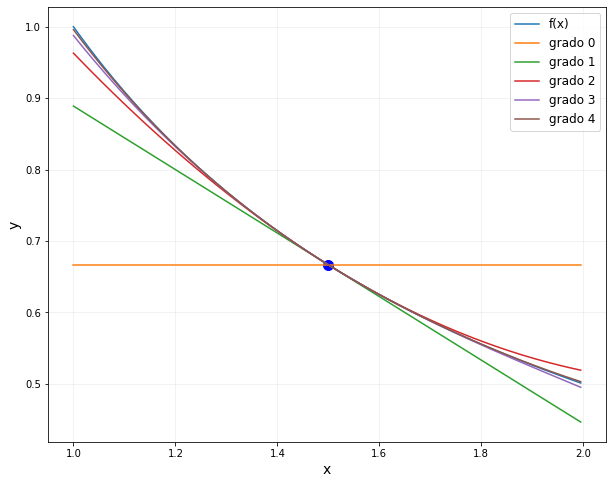

In [4]:
#Gráfica de resultados
plt.figure(figsize=(10, 8))

plt.scatter(x=x0, y=func(x0), s=100, c='b')
plt.plot(x, y, label='f(x)')
plt.plot(x, y_taylor_0, label='grado 0')
plt.plot(x, y_taylor_1, label='grado 1')
plt.plot(x, y_taylor_2, label='grado 2')
plt.plot(x, y_taylor_3, label='grado 3')
plt.plot(x, y_taylor_4, label='grado 4')

#Anotaciones y estilo
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)

plt.show()

### Calculando el error
Para una aproximación de Taylor centrada en $x_{0}=1.5$ y evaluada en $x=1.9$

In [5]:
x_val = [1.9]
y_val = func(x_val[0])

for i in range(len(n)):
    y_hat = aprox_taylor(x=x_val, c=x0, n=n[i])[0]
    rel_err = abs(y_hat - y_val) / abs(y_val)
    
    print(f"Error relativo Taylor {n[i]}°: {rel_err:.6f}")

Error relativo Taylor 0°: 0.266667
Error relativo Taylor 1°: 0.071111
Error relativo Taylor 2°: 0.018963
Error relativo Taylor 3°: 0.005057
Error relativo Taylor 4°: 0.001348


## Ejercicio
Aproximar $f(1)$ con polinomios de Taylor de orden $[0,1,2,3,4]$ si $f(x)=-0.1x^{4}-0.15x^{3}-0.5x^{2}-0.25x+1.2$ con centro en $x0=0$. Calcula los errores relativos de tus aproximaciones. Realiza las gráficas de cada polinomio en el intervalo $[0,1]$. Observa que $R_{5}(x)$ es cero.

**Paso 1**: Se generan y almacenan las derivadas de $f(x)$

 ```python
from sympy import Symbol, diff
 
n = np.arange(5)
x = Symbol('x')

#Se define diccionario para expresiones, f_derivatives[0]: f(x)
f_derivatives = [(-0.1*x**4) - (0.15*x**3) - (0.5*x**2) - (0.25*x) + 1.2]

#Se generan derivadas simbólicas hasta encontrar f_n = 0
k = 0
while True:
    f_derivatives.append( diff(f_derivatives[k]) )
    k += 1
    if f_derivatives[k] == 0: break
        
for f_ in f_derivatives: print(f_)
```

**Paso 2**: Se almacenan las derivadas como funciones de `python`

In [6]:
f_dict = {0: lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2,
         1: lambda x: -0.4*x**3 - 0.45*x**2 - 1.0*x - 0.25,
         2: lambda x: -1.2*x**2 - 0.9*x - 1.0,
         3: lambda x: -2.4*x - 0.9,
         4: lambda x: -2.4}

**Paso 3**: Se redefine la función de la serie de Taylor

In [7]:
def aprox_taylor(f_dict, x, c, n):
    """
    Taylor approximation for given function. Will return Taylor polynomial of degree n with
    center in c and evaluated in x.
    Args:
        f_dict: dictionary (int keys [0,...,n]) containing f(x), f'(x), f''(x),..., fn(x)
        x: numeric vector or scalar in which Taylor polynomial will be evaluated. 
        c: scalar which represents center of Taylor polynomial of degree n.
        n: scalar which represents degree of Taylor polynomial. 
    --------------------
    Returns:
        sum_taylor: scalar evaluation of Taylor polynomial of degree n with center c in x.
    """
    sum_taylor = np.zeros(len(x))
    
    for i in range(len(x)):
        for j in range(n+1):
            mult = f_dict[j](c) * (x[i]-c)**j / np.math.factorial(j)
            sum_taylor[i] = sum_taylor[i] + mult
    
    return sum_taylor

### Graficando Taylor

In [8]:
#Se definen parámetros para aproximación de taylor
x0 = 0
x = np.arange(0, 1, 0.005)
n = np.arange(0,5)
y = f_dict[0](x)

#Se aproxima 'y' con taylor para diferentes n
y_taylor_0 = aprox_taylor(f_dict, x, x0, n[0])
y_taylor_1 = aprox_taylor(f_dict, x, x0, n[1])
y_taylor_2 = aprox_taylor(f_dict, x, x0, n[2])
y_taylor_3 = aprox_taylor(f_dict, x, x0, n[3])
y_taylor_4 = aprox_taylor(f_dict, x, x0, n[4])

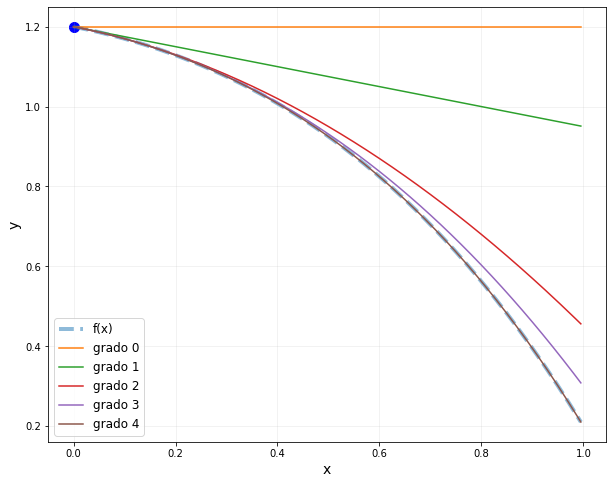

In [9]:
#Gráfica de resultados
plt.figure(figsize=(10, 8))

plt.scatter(x=x0, y=f_dict[0](x0), s=100, c='b')
plt.plot(x, y, '--', label='f(x)', linewidth=4, alpha=0.5)
plt.plot(x, y_taylor_0, label='grado 0')
plt.plot(x, y_taylor_1, label='grado 1')
plt.plot(x, y_taylor_2, label='grado 2')
plt.plot(x, y_taylor_3, label='grado 3')
plt.plot(x, y_taylor_4, label='grado 4')

#Anotaciones y estilo
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)

plt.show()

### Calculando el error

In [10]:
x_val = [1]
y_val = f_dict[0](x_val[0])

for i in range(len(n)):
    y_hat = aprox_taylor(f_dict, x=x_val, c=x0, n=n[i])[0]
    rel_err = abs(y_hat - y_val) / abs(y_val)
    
    print(f"Error relativo Taylor {n[i]}°: {rel_err:.3f}")

Error relativo Taylor 0°: 5.000
Error relativo Taylor 1°: 3.750
Error relativo Taylor 2°: 1.250
Error relativo Taylor 3°: 0.500
Error relativo Taylor 4°: 0.000


# Diferencas Finitas

**Ejemplo**:
<br>Realizar una gráfica de `log(error relativo)` vs `log(h)` (h en el eje horizontal) para aproximar la primera derivada de $f(x)=e^{-x}$ en $x=1$ con $h\in[10^{-16},...,10^{-1}]$ y diferencias hacia adelante.
<br>Valor por aproximar: $f^{(1)}(1)=-e^{-1}$

In [11]:
#Función de interés
def F(x): return np.exp(-x)

#Aprox. derivada x difs. finitas adelante
def approx_first_der(f, x, h):  return ( f(x+h) - f(x) )/h

In [12]:
#Diccionario para almacenar derivadas
dif_adela = {'h': [],
            'd_1': []}

#Vector de h's: [1e-1, 1e-16]
for i in range(1,17):
    dif_adela['h'].append(math.pow(10, -i))
    
dif_adela['h'][:5]

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [13]:
#Evaluando difs. finitas en torno a x=1
x = 1
for i in dif_adela['h']:
    dif_adela['d_1'].append(approx_first_der(F,x,i))
    
dif_adela['d_1'][:5]

[-0.35008357473362783,
 -0.3660461599919007,
 -0.3676955627487377,
 -0.36786104781250106,
 -0.36787760178125234]

In [14]:
#Valor objetivo
obj = -np.exp(-x)

#Convirtiendo a DataFrame y evaluando error
dif_adela = pd.DataFrame(dif_adela)
dif_adela['rel_err'] = np.abs((dif_adela['d_1'] - obj)) / np.abs(obj)

print("En x=1:\n")
dif_adela

En x=1:



,h,d_1,rel_err
0,1.000000e-01,-0.350084,4.837418e-02
1,1.000000e-02,-0.366046,4.983375e-03
2,1.000000e-03,-0.367696,4.998334e-04
3,1.000000e-04,-0.367861,4.999833e-05
4,1.000000e-05,-0.367878,4.999981e-06
5,1.000000e-06,-0.367879,5.000218e-07
6,1.000000e-07,-0.367879,4.929857e-08
7,1.000000e-08,-0.367879,8.556935e-09
8,1.000000e-09,-0.367880,1.725170e-07
9,1.000000e-10,-0.367880,4.743069e-07


### Graficando el error

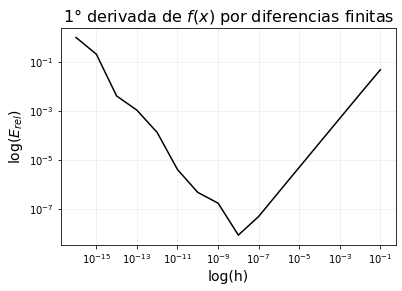

In [15]:
plt.plot(dif_adela['h'], dif_adela['rel_err'], color='black')

#Anotaciones y estilo
plt.title("1° derivada de $f(x)$ por diferencias finitas", fontsize=16)
plt.xlabel('log(h)', fontsize=14)
plt.ylabel('log($E_{rel}$)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.2)

plt.show()

## Ejercicio
Utilizando lenguajes de programación realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h\in{10^{-16},10^{-15},...,10^-{1}}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1)=e^{-1}$.
<br>Usar: 
$$\frac{d^2}{dx}f(x)=\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}+O(h)$$

Encontrar valor(es) de $h$ que minimiza(n) al error absoluto y relativo.

In [16]:
#Función de interés
def F(x): return np.exp(-x)

#Aprox. derivada x difs. finitas adelante
def approx_first_der(f, x, h):  return ( f(x+h) - f(x) )/h
def approx_second_der(f, x, h): return ( f(x+2*h) - 2*f(x+h) + f(x) )/(h**2)

In [17]:
#Diccionario para almacenar derivadas
dif_adela = {'h': [],
            'd_2': []}

#Vector de h's: [1e-1, 1e-16]
for i in range(1,17):
    dif_adela['h'].append(math.pow(10, -i))
    
dif_adela['h'][:5]

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [18]:
#Evaluando difs. finitas en torno a x=1
x = 1
for i in dif_adela['h']:
    dif_adela['d_2'].append(approx_second_der(F,x,i))
    
dif_adela['d_2'][:5]

[0.3331485687485369,
 0.3642220147398456,
 0.3675117761781088,
 0.3678426563347159,
 0.36787628499013175]

In [19]:
#Valor objetivo
obj = -np.exp(-x)

#Convirtiendo a DataFrame y evaluando error
dif_adela = pd.DataFrame(dif_adela)
dif_adela['rel_err'] = np.abs((dif_adela['d_2'] - obj)) / np.abs(obj)

print("En x=1:\n")
dif_adela

En x=1:



,h,d_2,rel_err
0,1.000000e-01,3.331486e-01,1.905592e+00
1,1.000000e-02,3.642220e-01,1.990058e+00
2,1.000000e-03,3.675118e-01,1.999001e+00
3,1.000000e-04,3.678427e-01,1.999900e+00
4,1.000000e-05,3.678763e-01,1.999991e+00
5,1.000000e-06,3.678169e-01,1.999830e+00
6,1.000000e-07,3.774758e-01,2.026086e+00
7,1.000000e-08,-5.551115e-01,5.089495e-01
8,1.000000e-09,1.110223e+02,3.027899e+02
9,1.000000e-10,0.000000e+00,1.000000e+00


### Graficando el error

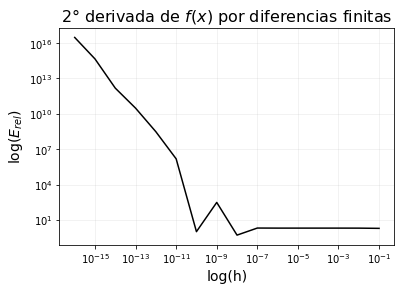

In [20]:
plt.plot(dif_adela['h'], dif_adela['rel_err'], color='black')

#Anotaciones y estilo
plt.title("2° derivada de $f(x)$ por diferencias finitas", fontsize=16)
plt.xlabel('log(h)', fontsize=14)
plt.ylabel('log($E_{rel}$)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.2)

plt.show()

## Ejercicio
Obtener de forma analítica el valor de $h$ que minimiza la función $g(h)$ anterior. Tip: utilizar criterio de primera y segunda derivada para encontrar mínimo global.
<br>Sea $g(h)=K_1 h + K_2\frac{1}{h}$, entonces sus derivadas:
* $g^{(1)}(h)=K_1-K_2\frac{1}{h^2}=0\therefore h=({\frac{K_2}{K_1}})^\frac{1}{2}$

El valor mínimo es $g(h)|h=\sqrt{\frac{K_2}{K_1}}$, es decir, $2\sqrt{K_1K_2}$

**Pregunta**: ¿Por qué se alcanza el máximo error relativo en el valor de $h=10^{-16}$?
<br>Porque recordemos que la $\epsilon_{m}$ de un sistema double (64 bits) es del orden de magnitud de $10^{-16}$, por lo que un valor $C$ de orden de magnitud $10^{-n}$ resultará en valores de orden $10^{-(16+n)}$, lo cual supera la $\epsilon_{m}$ y por ende se llega al máximo error relativo.

```python
eps = np.spacing(1)/2
[eps]: 1.1102230246251565e-16
```

# Diferencición Numérica para $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$

**Ejemplo**:
<br> Aproximar $\nabla f(x)$ con diferencias hacia adelante y $h\in[10^{-16},...,10^{-1}]$ para $f:\mathbb{R}^{4}\rightarrow\mathbb{R}$, dada por $f(x)=(x_{1}^2-x_{2}^2)^2+x_{1}^2+(x_{3}^2-x_{4}^2)+x_{3}^2$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. Realizar una gráfica de `log(error relativo)` vs `log(h)`

Primero validamos con `sympy` el gradiente de la función.

In [21]:
import sympy
from sympy.tensor.array import derive_by_array

Cálculo del **gradiente** de forma simbólica

In [22]:
x1, x2, x3, x4 = sympy.symbols("x1,x2,x3,x4")
x = (x1, x2, x3, x4)

f = (x1**2 - x2**2)**2 + x1**2 + (x3**2 - x4**2)**2 + x3**2

grad_f = derive_by_array(f, x)
grad_f

[4*x1*(x1**2 - x2**2) + 2*x1, -4*x2*(x1**2 - x2**2), 4*x3*(x3**2 - x4**2) + 2*x3, -4*x4*(x3**2 - x4**2)]

In [23]:
for i in range(len(grad_f)):
    print(f"{i}: {grad_f[i].evalf(subs={x1:1.5, x2:1.5, x3:1.5, x4:1.5}):.0f}")

0: 3
1: -0
2: 3
3: -0


Cálculo de la **Hessiana** en forma simbólica

In [24]:
hess_f = derive_by_array(grad_f, x)
hess_f

[[12*x1**2 - 4*x2**2 + 2, -8*x1*x2, 0, 0], [-8*x1*x2, -4*x1**2 + 12*x2**2, 0, 0], [0, 0, 12*x3**2 - 4*x4**2 + 2, -8*x3*x4], [0, 0, -8*x3*x4, -4*x3**2 + 12*x4**2]]

In [25]:
for i in range(hess_f.shape[0]):
    for j in range(hess_f.shape[1]):
        print(f"{i, j}: {hess_f[i][j].evalf(subs={x1:1.5, x2:1.5, x3:1.5, x4:1.5}):.0f}")

(0, 0): 20
(0, 1): -18
(0, 2): 0
(0, 3): 0
(1, 0): -18
(1, 1): 18
(1, 2): 0
(1, 3): 0
(2, 0): 0
(2, 1): 0
(2, 2): 20
(2, 3): -18
(3, 0): 0
(3, 1): 0
(3, 2): -18
(3, 3): 18


Definición de la función y punto en el que se va a evaluar

In [26]:
x0 = np.repeat(1.5, 4)

func = lambda x: (x[0]**2 - x[1]**2)**2 + x[0]**2 + (x[2]**2 - x[3]**2)**2 + x[2]**2

In [27]:
def inc_index(vec, index, h):
    """
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (double): vector
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (double): vector with vec[index] increased by h.
    """
    vec[index] = vec[index] + h
    return vec

def gradient_approximation(f, x, h=1e-8):
    """
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (function): definition of function f.
        x (double): vector that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.
    """
    n = len(x)
    gf = np.zeros(n)
    for i in range(n):
        gf[i] = f(inc_index(x, i, h)) - f(x)

    return gf / h

def hessian_approximation(f, x, h=1e-6):
    """
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (function): definition of function f.
        x (double): vector that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (double): matrix of numerical approximation to Hessian of f.
    """
    n = len(x)
    Hf = np.zeros((n, n))
    f_x = f(x)
    for i in range(n):
        x_inc_in_i = inc_index(x, i, h)
        f_x_inc_in_i = f(x_inc_in_i)
        for j in np.arange(i, n):
            dif = f(inc_index(x_inc_in_i, j, h)) - f_x_inc_in_i - f(inc_index(x, j, h)) + f_x
            Hf[i,j] = dif
            if j != i:
                Hf[j,i] = dif

    return Hf / h**2

### Calculando el error

In [28]:
#Diccionario para almacenar derivadas
dif_rn = {'h': []}

#Vector de h's: [1e-1, 1e-16]
for i in range(1,17):
    dif_rn['h'].append(math.pow(10, -i))
    
dif_rn['h'][:5]

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [29]:
def euclidian_norm(vec):
    """Compute Euclidian norm of vector"""
    return np.sqrt(sum(vec*vec))

def compute_error(obj,approx):
    """
    Relative or absolute error between obj and approx based in Euclidian norm. 
    Approx is a numeric vector.
    """
    if euclidian_norm(obj > np.spacing(1)/2 * 2.225074e-308):
        Err = euclidian_norm(obj - approx) / euclidian_norm(obj)
    else:
        Err = Euclidian_norm(obj-approx)
    return Err

In [30]:
for h in dif_rn['h']:
    print(gradient_approximation(func, x0, h))

[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
